#### We will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly. 
#### Suppose we are the product manager of the factory and we have the test results for some microchips on two different tests. From these two tests, we would like to determine whether the microchips should be accepted or rejected. 

In [1]:
# load the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_table('ex2data2.txt', header = None, sep=',')
#data.reset_index(drop=True, inplace = True)
data.columns =['Test1', 'Test2', 'Score']
data.head()
#Score = 1 means 'the chip is accepted'
#Score = 0 means 'the chip is rejected'

,Test1,Test2,Score
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


## Visualizing the Data

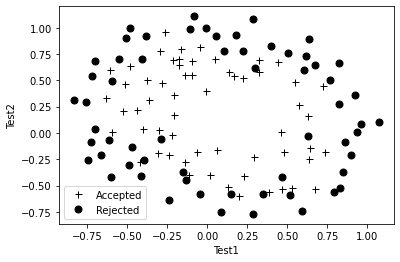

In [2]:
# finding the indices of 1 and 0 from 'Score' column

def plotdata(data):
    one_index = data.index[data['Score'] ==1].tolist()
    zero_index = data.index[data['Score'] ==0].tolist()

    plt.plot(data.iloc[one_index, 0], data.iloc[one_index, 1], 'k+', linewidth = 2, markersize = 7)
    plt.plot(data.iloc[zero_index, 0], data.iloc[zero_index, 1], 'ko', markersize = 7)
    plt.xlabel('Test1')
    plt.ylabel('Test2')
    plt.legend(['Accepted', 'Rejected'])
    plt.show()

plotdata(data)

#### We can see that the boundary line between 'Accepted' and 'Rejected' cannot be represented by a straight line. 
#### Therefore, a straightforward application of logistic regression will not preform well on this dataset since logistic regression will only be able to find a linear decision boundary.

## Feature Mapping

#### One way to fit the data better is to create more features from each data point. We will map the features into all polynomial terms of x1 and x2 up to the sixth power.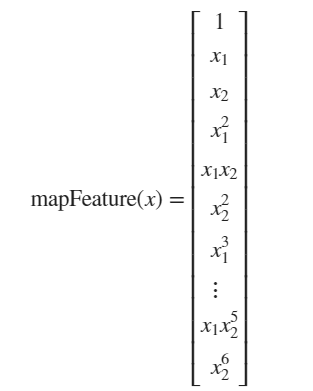

In [78]:
# This function will map the two input features to quadratic features used in the regularization exercise.
# Will return a new feature array with more features.
# input x1 and x2 must be of the same size.

def mapfeature(x1,x2,degree):
    
    # the bias term on the first column
    result = np.ones((x1.shape[0])).reshape(m,1)
    
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.multiply(np.power(x1,(i-j)),np.power(x2,j)).reshape(m,1)
            result = np.concatenate((result, out), axis =1)
            #print(out)
    return result

In [79]:
# define x and y
m = len(data.iloc[:, 2])
y = data.iloc[:, 2].to_numpy().reshape(m,1)
x_ = data.iloc[:, :2].to_numpy()

In [80]:
x = mapfeature(x_[:,0], x_[:,1], 6)
x.shape

(118, 28)

#### As a result of the mapping, out feature vector x has been transformed into a 28-dimensional vector. A logistic regression classifier trained on this higher-dimension feature vector will have a more complex decision boundary and will appear non-linear when drawin in our 2D plot.
#### While feature mapping allows us to build a more expressive classifier, it is also more susceptible to overfitting. 

## Cost Function and Gradient

#### The regularized cost function in logistic regression is 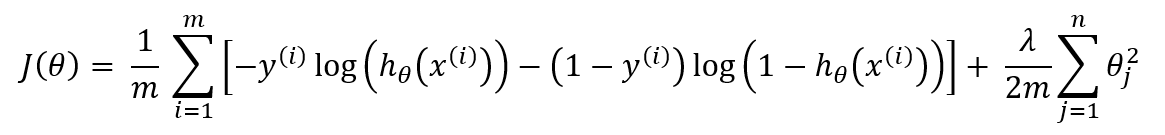
#### Note: we should not regularize theta0. 
#### The gradient of the cost function is a vector where the jth element is defined as: 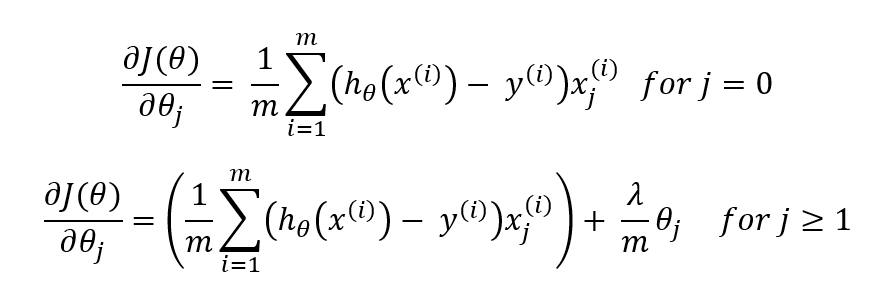

In [85]:
# initialize theta
theta_start = np.zeros((x.shape[1], 1))

# set regularization parameter to 1
lambda_ = 1

In [91]:
# this function will compute cost of using theta as the parameter for regularized logistic regression 

def sigmoid(z):
    g = 1/(1 + np.exp(-z))
    return g

def J_reg(theta, x, y, lambdaa):
    m = len(y)
    y_prime = np.transpose(y)
    x_prime = np.transpose(x)
    h_theta = sigmoid(np.dot(x,theta))
    
    J = (-np.dot(y_prime, np.log(h_theta)) -  np.dot(np.transpose(1-y), np.log(1-h_theta)) 
        + 0.5*lambdaa*np.sum(np.power(theta[1::],2)))/ m
    J = np.sum(J)
    
    #grad_of_cost = (np.dot(x_prime, (h_theta - y)))/ m
    
    return J

In [96]:
# Gradient of the cost

def Gradient(theta, x, y, lambdaa):
    m = len(y)
    #x_prime = np.transpose(x)
    
    error = sigmoid(np.dot(x,theta)) - y
    grad = np.zeros((x.shape[1], 1))
    
    for i in range(x.shape[1]):
        if i==0:
            grad[i] = (np.dot(np.transpose(x[:,i]), error))/ m
        else:
            grad[i] = (np.dot(np.transpose(x[:,i]), error))/ m + theta[i]*lambdaa/m
    #grad[i] = np.sum(term) / m 
    #grad = (np.dot(x_prime, error))/ m
    #grad = grad.flatten()
    return grad

In [112]:
cost, grad = J_reg(theta_start, x, y, 1), Gradient(theta_start,x,y,1)
print('Cost at initial theta (zeros): {}'.format(cost) )

print('Gradient at initial theta (zeros) - first five values only:\n')
print('\n', grad[0:5])


Cost at initial theta (zeros): 0.6931471805599453
Gradient at initial theta (zeros) - first five values only:


 [[8.47457627e-03]
 [1.87880932e-02]
 [7.77711864e-05]
 [5.03446395e-02]
 [1.15013308e-02]]


In [111]:
test_theta = np.ones((x.shape[1], 1))
cost, grad = J_reg(test_theta, x, y, 10), Gradient(test_theta,x,y,10)
print('Cost at initial theta (non-zeros): {}'.format(cost) )

print('Gradient at initial theta (non-zeros) - first five values only:\n')
print('\n', grad[0:5])

Cost at initial theta (non-zeros): 3.16450933161501
Gradient at initial theta (non-zeros) - first five values only:


 [[0.34604507]
 [0.16135192]
 [0.19479576]
 [0.22686278]
 [0.09218568]]
